In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

df = pd.read_csv('dados/articles.csv')

A base de dados possui os seguintes atributos: title, text, date, category, subcategory, link.

In [5]:
# Verificando quais atributos existem na base de dados.
df.columns

Index(['title', 'text', 'date', 'category', 'subcategory', 'link'], dtype='object')

Verificando a quantidade de categorias de documentos presentes na base (48) percebemos que a base de dados tem o seu volume de categorias desbalanceado. Algumas categorias tem mais de 20 mil instâncias enquanto outras tem próximo a um documento.

<IPython.core.display.Javascript object>


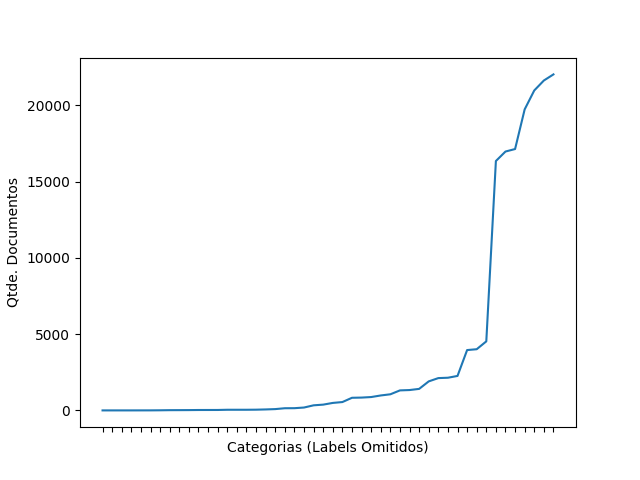

48

In [49]:
# Categorias presents na base de dados e suas respectivas contabilizações.
import collections
distrib = collections.Counter(df['category'])

xaxis = list()
yaxis = list()
for obj in sorted(distrib.items(), key = lambda pos: pos[1]):
    xaxis.append(obj[0])
    yaxis.append(obj[1])

fig, ax = plt.subplots()
ax.set_ylabel("Qtde. Documentos")
ax.set_xlabel("Categorias (Labels Omitidos)", labelpad=10)
#ax.axes.get_xaxis().set_visible(False)
plt.setp(ax.get_xticklabels(), visible=False)
ax.plot(xaxis, yaxis)
plt.savefig('graficos/distribuicao_categorias.pdf')
len(xaxis)


Verificando quais categorias são as mais presentes e ausentes na base verificamos que: (1) 4 categorias somam mais de 80 mil documentos da base e estão relacionadas a mercado, poder, colunas e esporte.

<IPython.core.display.Javascript object>


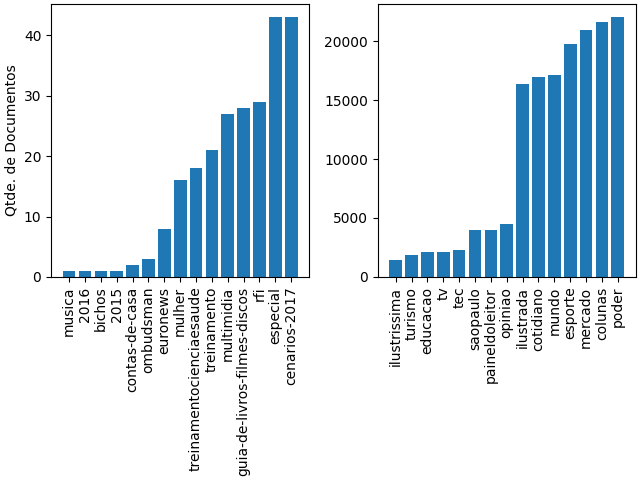

In [50]:
fig, grade = plt.subplots(1, 2, constrained_layout=True)

grade[0].set_xticklabels(xaxis[:15], rotation=90)
grade[0].set_ylabel("Qtde. de Documentos")
grade[0].bar(xaxis[:15],yaxis[:15])
grade[1].set_xticklabels(xaxis[-15:], rotation=90)
grade[1].bar(xaxis[-15:],yaxis[-15:])
fig.savefig('graficos/ranking_clategorias.pdf')

Analisamos a distribuição dos documentos publicados em cada mês da base de dados e percebemos que a base está ligeiramente balanceada, porém com uma tendência a diminuir os números de documentos para os meses finais, próximos a setembro de 2017. Nenhum dos meses apresentou menos de 3000 documentos.

<IPython.core.display.Javascript object>


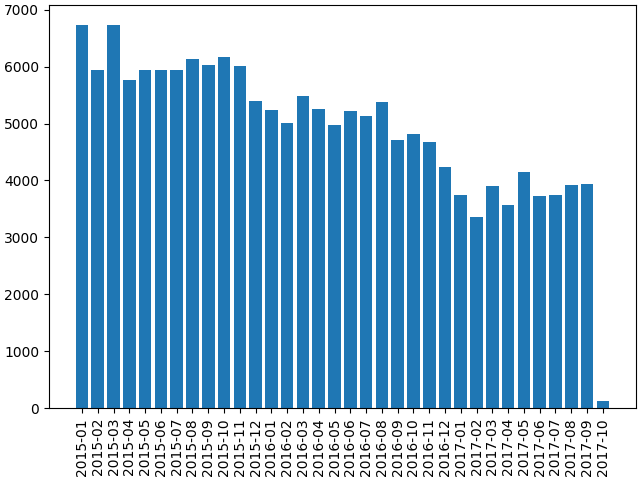

In [64]:
datas_por_mes = list()
for d in df['date']:
    dtp = d[:7]
    datas_por_mes.append(dtp)

xaxis = list()
yaxis = list()
datas_freq = collections.Counter(datas_por_mes)
for obj in sorted(datas_freq.items(), key = lambda pos: pos[0]):
    xaxis.append(obj[0])
    yaxis.append(obj[1])
    
fig, ax = plt.subplots(constrained_layout=True)

ax.set_xticklabels(xaxis, rotation=90)
ax.bar(xaxis, yaxis)
fig.savefig('graficos/distribuicao_docs_por_mes.pdf')
    